<a href="https://colab.research.google.com/github/shehan16252/Colab/blob/main/SimpleAndMultiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

**Task** - Predict the score given the number of hours spent by the students for studies

**Input** - Hours studies

**Output** - Score

In [8]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('/content/sample_data/w1_student_scores-220925-152435 (2).csv')

In [11]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Text(0, 0.5, 'Score')

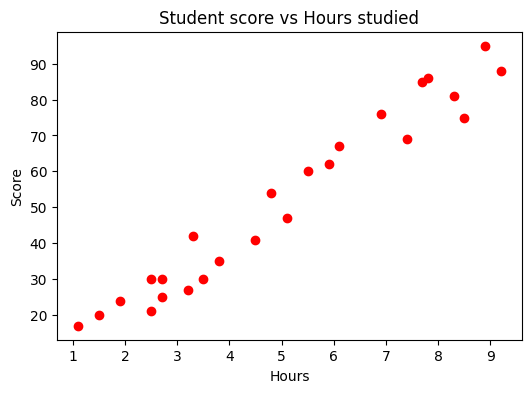

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(df['Hours'], df['Scores'], 'ro')
plt.title('Student score vs Hours studied')
plt.xlabel('Hours')
plt.ylabel('Score')

# Find coefficient (සංගුණකය)

Calculate the mean of input and output

In [13]:
xmean = np.mean(df['Hours'])
ymean = np.mean(df['Scores'])

Calculate the terms needed for the numator and denominator of beta (බීටා හි අංකනය සහ හරය සඳහා අවශ්‍ය නියමයන් ගණනය කරන්න)

In [14]:
df['xycov'] = (df ['Hours'] - xmean) * (df['Scores'] - ymean)
df['xvar'] = (df['Hours'] - xmean) **2

Calculate the coefficient

In [15]:

slope = df['xycov'].sum() / df['xvar'].sum()
intercept = ymean - (slope * xmean)
print(f'slope = {slope}')
print(f'intercept = {intercept}')

slope = 9.775803390787473
intercept = 2.4836734053731817


# Making prediction

In [16]:
intercept + slope * 10

100.24170731324791

In [17]:
Scores_predicted = intercept + slope * df['Hours']

Compute a score of a student who studied for 7 hours

Text(0, 0.5, 'Score')

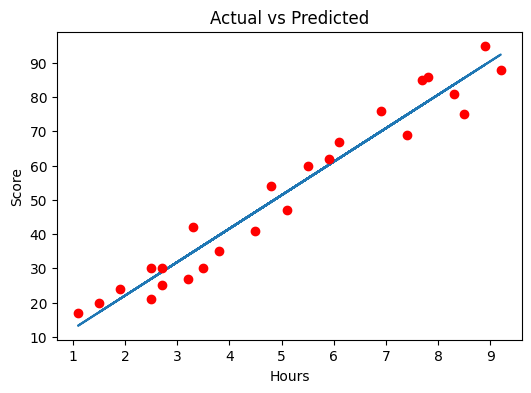

In [18]:
plt.figure(figsize=(6, 4))
plt.plot(df['Hours'], Scores_predicted)           #regression line
plt.plot(df['Hours'], df['Scores'], 'ro')         #Scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Score')

# 2. Multiple Linear Regression

**Task:** Predict petrol consumption of a country given various factors such as tax, distance of highways and population with driving license

**Input:** Tax, distance of highways, average income and population with driving license

**Output:** Expected petrol consumption



In [22]:
df = pd.read_csv('/content/sample_data/w1_petrol_consumption-220925-152435 (1).csv')

In [24]:
df.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [25]:
df.shape

(48, 5)

In [26]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


Text(0, 0.5, 'Petrol_Consumption')

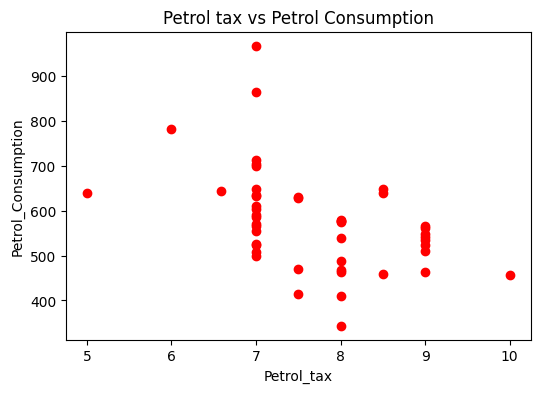

In [27]:
plt.figure(figsize=(6, 4))
plt.plot(df['Petrol_tax'], df['Petrol_Consumption'],'ro')
plt.title('Petrol tax vs Petrol Consumption')
plt.xlabel('Petrol_tax')
plt.ylabel('Petrol_Consumption')

Identify Outliers


Text(0, 0.5, 'Petrol_Consumption')

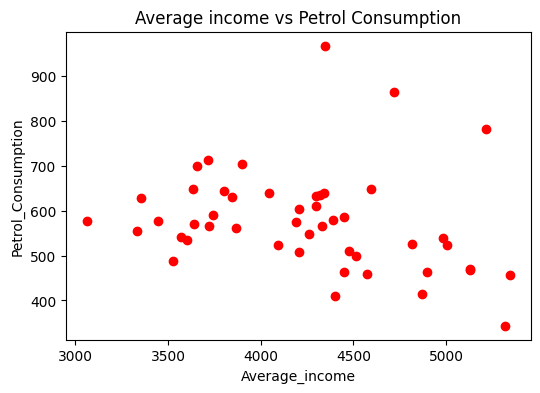

In [28]:
plt.figure(figsize=(6, 4))
plt.plot(df['Average_income'], df['Petrol_Consumption'],'ro')
plt.title('Average income vs Petrol Consumption')
plt.xlabel('Average_income')
plt.ylabel('Petrol_Consumption')

Train the model

In [30]:
Y = df['Petrol_Consumption']
X = df[['Average_income','Paved_Highways','Population_Driver_licence(%)','Petrol_tax']]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
LinearRegression()

LinearRegression()

In [35]:
regressor.intercept_

361.45087906668397

In [36]:
regressor.coef_

array([-5.65355145e-02, -4.38217137e-03,  1.34686930e+03, -3.69937459e+01])

In [38]:
y_pred = regressor.predict(X_test)

In [39]:
results = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(Y_test, y_pred)
MSE = mean_squared_error(Y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f'mean_absolute_error: {MAE:.2f}')
print(f'mean_squared_error: {MSE:.2f}')
print(f'root_mean_squared_error: {RMSE:.2f}')


mean_absolute_error: 53.47
mean_squared_error: 4083.26
root_mean_squared_error: 63.90


In [49]:
regressor.score(X_test, Y_test) #Closes to 0 so that means its not performing well

0.39136640014305457

In [50]:
regressor.score(X_train, Y_train) #Closes to 1 so that means its performing well

0.7068781342155135

**Possible mprovements**


*  Increase size of data
*  Try non-linear relation
*  May require more features




